In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df =pd.read_csv("XPREP8.csv")


<Axes: >

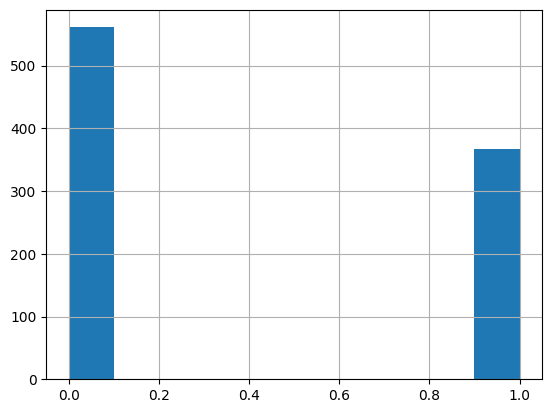

In [128]:
#graph to show number of worked and not worked values
df['worked?'].hist()

In [129]:
from sklearn.model_selection import train_test_split
X=df.drop(columns="worked?")
Y=df["worked?"]
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.30)

In [130]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [131]:
print("Accuracy - DT:",dt.score(x_test,y_test)*100)

Accuracy - DT: 100.0


In [132]:
print("Accuracy:", dt.score(x_train,y_train)*100)

Accuracy: 100.0


Predicted Accuracy: 0.996415770609319
[[155   0]
 [  1 123]]


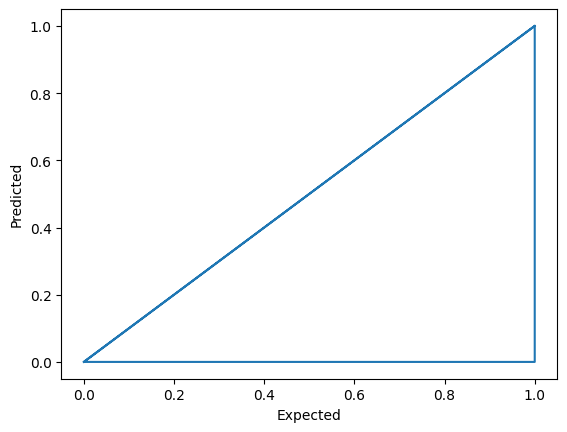

In [127]:
#metrics on the classifier model
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

y_predict = dt.predict(x_test)

print("Predicted Accuracy:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))

from matplotlib import pyplot
pyplot.plot(y_test, y_predict)
pyplot.xlabel('Expected')
pyplot.ylabel('Predicted')
pyplot.show()

In [90]:
#Applying regression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
X=df.drop(columns="percentage_returns given")
Y=df["percentage_returns given"]
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.30)


In [87]:

dtr= DecisionTreeRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor()
dtr.fit(x_train,y_train)
print("DTR accuracy :=",dtr.score(x_test,y_test)*100)
yp1=dtr.predict(x_test)

(rfr.fit(x_train,y_train))
print("RFR accuracy :=",rfr.score(x_test,y_test)*100)
yp2=rfr.predict(x_test)

xgb.fit(x_train,y_train)
print("XGB accuracy :=",xgb.score(x_test,y_test)*100)
yp3=xgb.predict(x_test)


DTR accuracy := 57.21100589547328
RFR accuracy := 66.45129120491094
XGB accuracy := 67.59913809223151


In [94]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('DTR', dtr), ('RFR', rfr), ('XGB', xgb)])
er.fit(x_test,y_test)
print("Ensemble Accuracy:=",er.score(x_test,y_test)*100)

Ensemble Accuracy:= 99.4018401001387


In [102]:
#metrics on regression model
from sklearn.metrics import mean_squared_error
y_predict = er.predict(x_test)
print("Mean Squared Error",mean_squared_error(y_test, y_predict))

Mean Squared Error 0.07459553867323676


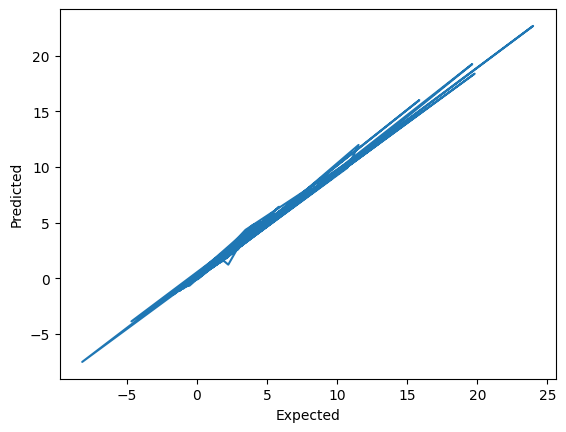

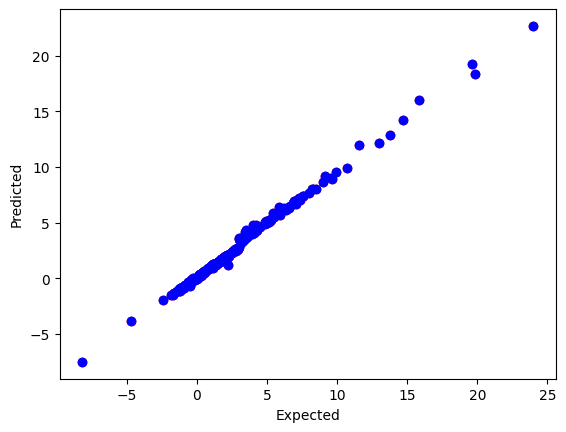

In [116]:
from matplotlib import pyplot
pyplot.plot(y_test, y_predict)
#pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Expected')
pyplot.ylabel('Predicted')
pyplot.show()
colors = ['red','blue']
labels=['expected','predicted']
for i in range (2):
    pyplot.scatter(y_test, y_predict,c=colors[i],label=labels[i])
pyplot.xlabel('Expected')
pyplot.ylabel('Predicted')
pyplot.show()